# LOSS AND ERROR RATE -- DEMO

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [2]:
train_data=torch.load('../../data/mnist/train_data.pt')
train_label=torch.load('../../data/mnist/train_label.pt')
test_data=torch.load('../../data/mnist/test_data.pt')

### Make a ONE layer net class. 

In [3]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [4]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer, batchsize, learning rate

In [5]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=200

### Do 30 passes through the training set

In [13]:
for epoch in range(30):
    
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(60000)
 
    for count in range(0,60000,bs):
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data.view(bs,784)

        inputs.requires_grad_()

        scores=net( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute and accumulate stats
        
        num_batches+=1
        
        with torch.no_grad():
            
            running_loss += loss.item()

            error = utils.get_error( scores , minibatch_label)
            running_error += error.item()
        

    # compute stats for the full training set
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    
    print('epoch=',epoch, '\t loss=', total_loss , '\t error=', total_error*100 ,'percent')
        
    

epoch= 0 	 loss= 0.3241092038154602 	 error= 8.998333195845285 percent
epoch= 1 	 loss= 0.32344047546386717 	 error= 8.996666848659515 percent
epoch= 2 	 loss= 0.32279426674048106 	 error= 8.98333336909612 percent
epoch= 3 	 loss= 0.32215487882494925 	 error= 8.969999929269155 percent
epoch= 4 	 loss= 0.3215768676499526 	 error= 8.956666628519693 percent
epoch= 5 	 loss= 0.32096602469682695 	 error= 8.925000011920929 percent
epoch= 6 	 loss= 0.32038835108280184 	 error= 8.930000166098278 percent
epoch= 7 	 loss= 0.3198333343863487 	 error= 8.905000070730845 percent
epoch= 8 	 loss= 0.31926045686006543 	 error= 8.863333185513813 percent
epoch= 9 	 loss= 0.3187166953086853 	 error= 8.863333404064178 percent
epoch= 10 	 loss= 0.31816946243246397 	 error= 8.858333349227905 percent
epoch= 11 	 loss= 0.31765139510234197 	 error= 8.846666514873505 percent
epoch= 12 	 loss= 0.31713082080086075 	 error= 8.818333407243092 percent
epoch= 13 	 loss= 0.316621364702781 	 error= 8.831666648387909 per

### Choose image at random from the test set and see how good/bad are the predictions

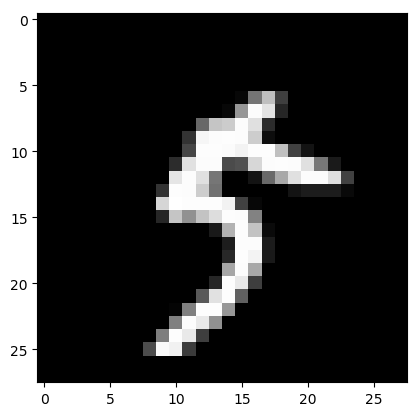

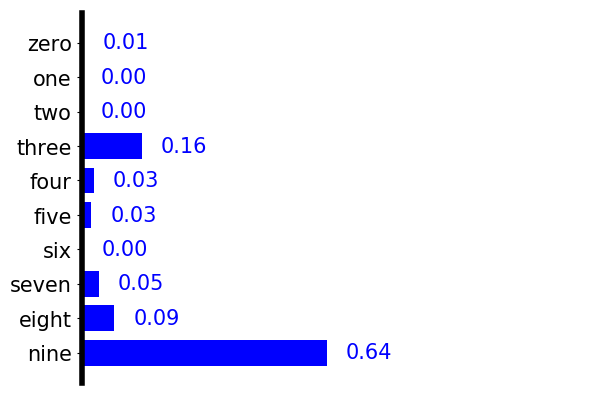

In [15]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= F.softmax(scores, dim=1)
utils.show_prob_mnist(probs)